In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score, roc_curve,
                             accuracy_score, r2_score, f1_score)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


import warnings

warnings.filterwarnings('ignore')
plt.rcParams.update({'figure.max_open_warning': 0})  
%matplotlib inline
sns.set_style('whitegrid')


In [2]:

data = pd.read_csv("data.csv")
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [8]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [9]:
dataset = data.drop(['loan_id'], axis = 1)

##  Data Analysis

<Figure size 800x600 with 0 Axes>

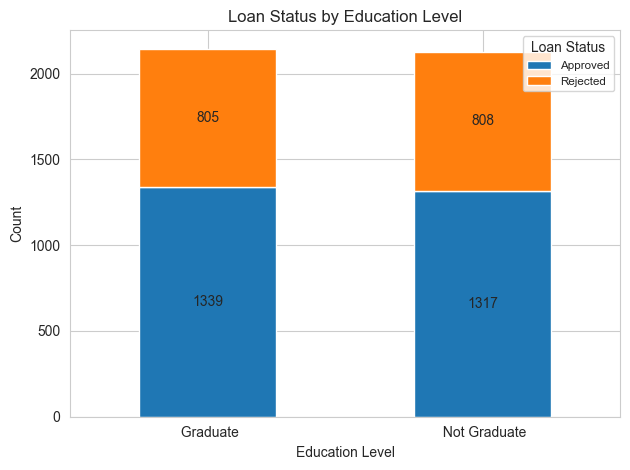

In [10]:
dataset.columns = dataset.columns.str.strip()
if 'education' in dataset.columns and 'loan_status' in dataset.columns:
    education_loan_status_counts = dataset.groupby(['education', 'loan_status']).size().unstack()
    plt.figure(figsize=(8, 6))
    ax = education_loan_status_counts.plot(kind='bar', stacked=True)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.text(x+width/2,
                y+height/2,
                '{:.0f}'.format(height),
                horizontalalignment='center',
                verticalalignment='center')
    plt.title('Loan Status by Education Level')
    plt.xlabel('Education Level')
    plt.ylabel('Count')
    plt.legend(title='Loan Status', loc='upper right', labels=['Approved', 'Rejected'], fontsize='small')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

<Figure size 800x600 with 0 Axes>

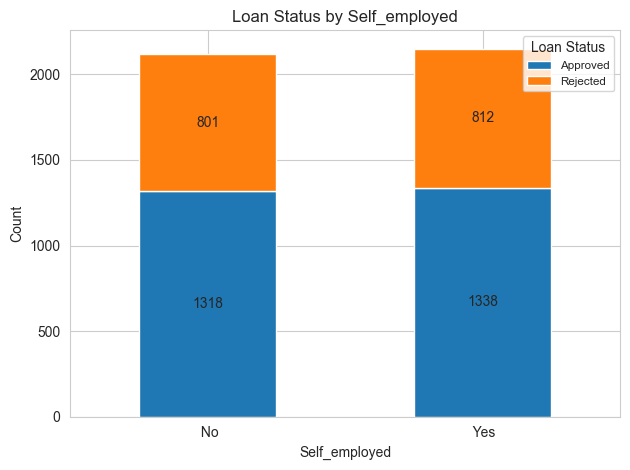

In [11]:
dataset.columns = dataset.columns.str.strip()
if 'self_employed' in dataset.columns and 'loan_status' in dataset.columns:
    education_loan_status_counts = dataset.groupby(['self_employed', 'loan_status']).size().unstack()
    plt.figure(figsize=(8, 6))
    ax = education_loan_status_counts.plot(kind='bar', stacked=True)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.text(x+width/2,
                y+height/2,
                '{:.0f}'.format(height),
                horizontalalignment='center',
                verticalalignment='center')
    plt.title('Loan Status by Self_employed')
    plt.xlabel('Self_employed')
    plt.ylabel('Count')
    plt.legend(title='Loan Status', loc='upper right', labels=['Approved', 'Rejected'], fontsize='small')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

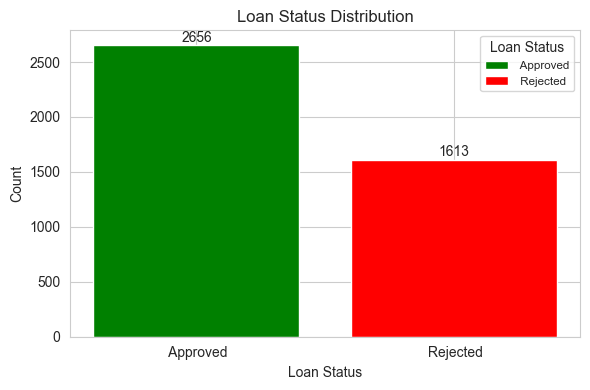

In [12]:
loan_status_counts = dataset['loan_status'].value_counts()

plt.figure(figsize=(6, 4))
bars = plt.bar(loan_status_counts.index, loan_status_counts.values, color=['green', 'red'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(bars, loan_status_counts.index, title='Loan Status', loc='upper right', fontsize='small')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dataset['self_employed'] = le.fit_transform(dataset['self_employed'])
dataset['loan_status'] = le.fit_transform(dataset['loan_status'])
dataset['education'] = le.fit_transform(dataset['education'])

dataset.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


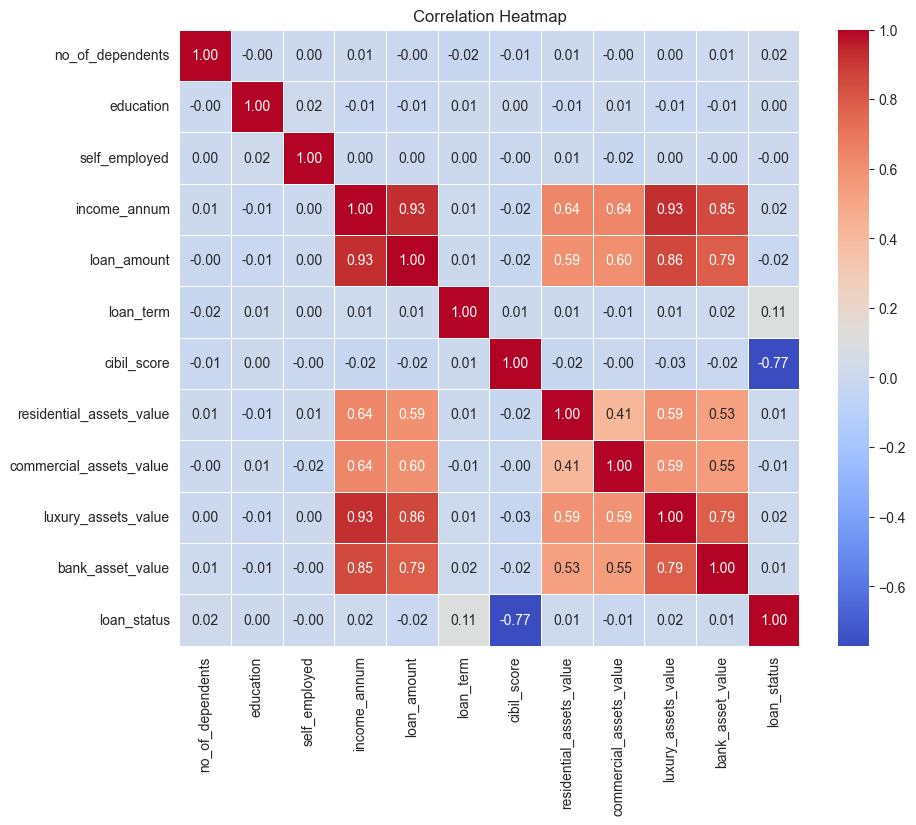

In [14]:
numeric_columns = dataset.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Modelling

In [15]:
df = dataset

In [16]:

X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [17]:
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [18]:
X.describe()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,0.497775,0.503631,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,0.500054,0.500045,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,0.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,0.000000,0.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,0.000000,1.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,1.000000,1.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,1.000000,1.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:

def get_columns_by_category():
    categorical_mask = X.select_dtypes(
        include=['object']).apply(pd.Series.nunique) == 2
    numerical_mask = X.select_dtypes(
        include=['int64', 'float64']).apply(pd.Series.nunique) > 5

    binary_columns = X[categorical_mask.index[categorical_mask]].columns
    nominal_columns = X[categorical_mask.index[~categorical_mask]].columns
    numerical_columns = X[numerical_mask.index[numerical_mask]].columns

    return binary_columns, nominal_columns, numerical_columns

In [21]:
binary_columns, nominal_columns, numerical_columns = get_columns_by_category()

In [22]:

transformers = [('binary', OrdinalEncoder(), binary_columns),
                ('nominal', OneHotEncoder(), nominal_columns),
                ('numerical', StandardScaler(), numerical_columns)]

transformer_pipeline = ColumnTransformer(transformers, remainder='passthrough')

In [23]:
Kfold = StratifiedKFold(n_splits=5)

In [24]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


RANDOM_STATE = 42
classifiers = [LogisticRegression(max_iter=70, solver='sag', random_state=RANDOM_STATE),
               DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE),
               SVC(C=2, kernel='linear', random_state=RANDOM_STATE),
               RandomForestClassifier(
                   max_depth=7, min_samples_split=5, min_samples_leaf=5, random_state=RANDOM_STATE),
               LGBMClassifier(num_leaves=300,max_depth= 8, n_estimators=1000, learning_rate=0.04,
                              min_data_in_leaf = 300),
               AdaBoostClassifier(DecisionTreeClassifier(
                   max_depth=1, random_state=RANDOM_STATE), random_state=RANDOM_STATE),
               GradientBoostingClassifier(
                   learning_rate=0.005, n_estimators=30, random_state=RANDOM_STATE),
               KNeighborsClassifier(),
               GaussianNB(var_smoothing=1e-2)
               ]

In [25]:
classifiers_names = ['Logistic Regression',
                     'Decision Tree Classifier',
                     'Support Vector Machine',
                     'Random Forest Classifier',
                     'LGBMClassifier',
                     'AdaBoost Classifier',
                     'Gradient Boosting Classifier',
                     'K Neighbors Classifier',
                     'Gaussian Naive Bayes']

pipelines = [Pipeline([('transformer', transformer_pipeline), (classifier_name, classifier)])
             for classifier_name, classifier in zip(classifiers_names, classifiers)]

In [26]:

def cv_fit_models():
    train_acc_results = []
    cv_scores = {classifier_name: [] for classifier_name in classifiers_names}
    for classifier_name, pipeline in zip(classifiers_names, pipelines):
        cv_score = cross_validate(pipeline,
                                  X_train,
                                  y_train,
                                  scoring=scoring,
                                  cv=Kfold,
                                  return_train_score=True,
                                  return_estimator=True)

        train_accuracy = cv_score['train_acc'].mean() * 100

        train_acc_results.append(train_accuracy)
        cv_scores[classifier_name].append(cv_score)

    return np.array(train_acc_results), cv_scores

In [27]:
scoring = {'acc': 'accuracy'}

results, folds_scores = cv_fit_models()

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Info] Number of positive: 978, number of negative: 1582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1435
[LightGBM] [Info] Number of data points in the train set: 2560, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382031 -> initscore=-0.480935
[LightGBM] [Info] Start training from score -0.480935
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

In [28]:

def pick_best_estimator():
    best_estimators = {classifier_name: [] for classifier_name in classifiers_names}
    for key, model in folds_scores.items():
        best_acc_idx = np.argmax(model[0]['test_acc'])
        best_model = model[0]['estimator'][best_acc_idx]
        best_estimators[key].append(best_model)
    return best_estimators

In [29]:
best_estimators = pick_best_estimator()

In [30]:

def gather_metrics_scores():
    test_accs, precisions, recalls = [], [], []
    for estimator_val in best_estimators.values():
        estimator = estimator_val[0]
        y_pred = estimator.predict(X_test)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        score = estimator.score(X_test, y_test)

        test_accs.append(score)
        precisions.append(precision)
        recalls.append(recall)

    scores = {'test_acc': np.array(test_accs),
              'precision': np.array(precisions),
              'recall': np.array(recalls)}

    return scores

In [31]:
scores = gather_metrics_scores()

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300


In [33]:

def plot_train_test_accuracy(df):
    _, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
    sns.barplot(data=df, x='train_accuracy',
                y='Model', orient='h', ax=ax[0],
               order=df.sort_values('train_accuracy',ascending = False).Model)
    ax[0].set_xlim([0, 100])
    sns.barplot(data=df, x='test_accuracy',
                y='Model', orient='h', ax=ax[1],
               order=df.sort_values('test_accuracy',ascending = False).Model)
    ax[1].set_xlim([0, 100])

In [34]:
results_df = pd.DataFrame({'Model': classifiers_names,
                           'train_accuracy': results,
                           'test_accuracy': scores['test_acc'] * 100,
                           'test_precision': scores['precision'] * 100,
                           'test_recall': scores['recall'] * 100})

In [35]:
results_df

,Model,train_accuracy,test_accuracy,test_precision,test_recall
0,Logistic Regression,92.065026,90.262172,90.229197,90.262172
1,Decision Tree Classifier,95.641986,96.161049,96.379960,96.161049
2,Support Vector Machine,92.767925,91.573034,91.634007,91.573034
3,Random Forest Classifier,99.179944,98.501873,98.501873,98.501873
4,LGBMClassifier,100.000000,98.127341,98.126026,98.127341
5,AdaBoost Classifier,98.024038,97.097378,97.109669,97.097378
6,Gradient Boosting Classifier,61.793190,63.483146,40.301098,63.483146
7,K Neighbors Classifier,94.423663,89.794007,89.950907,89.794007
8,Gaussian Naive Bayes,93.595760,93.258427,93.357421,93.258427


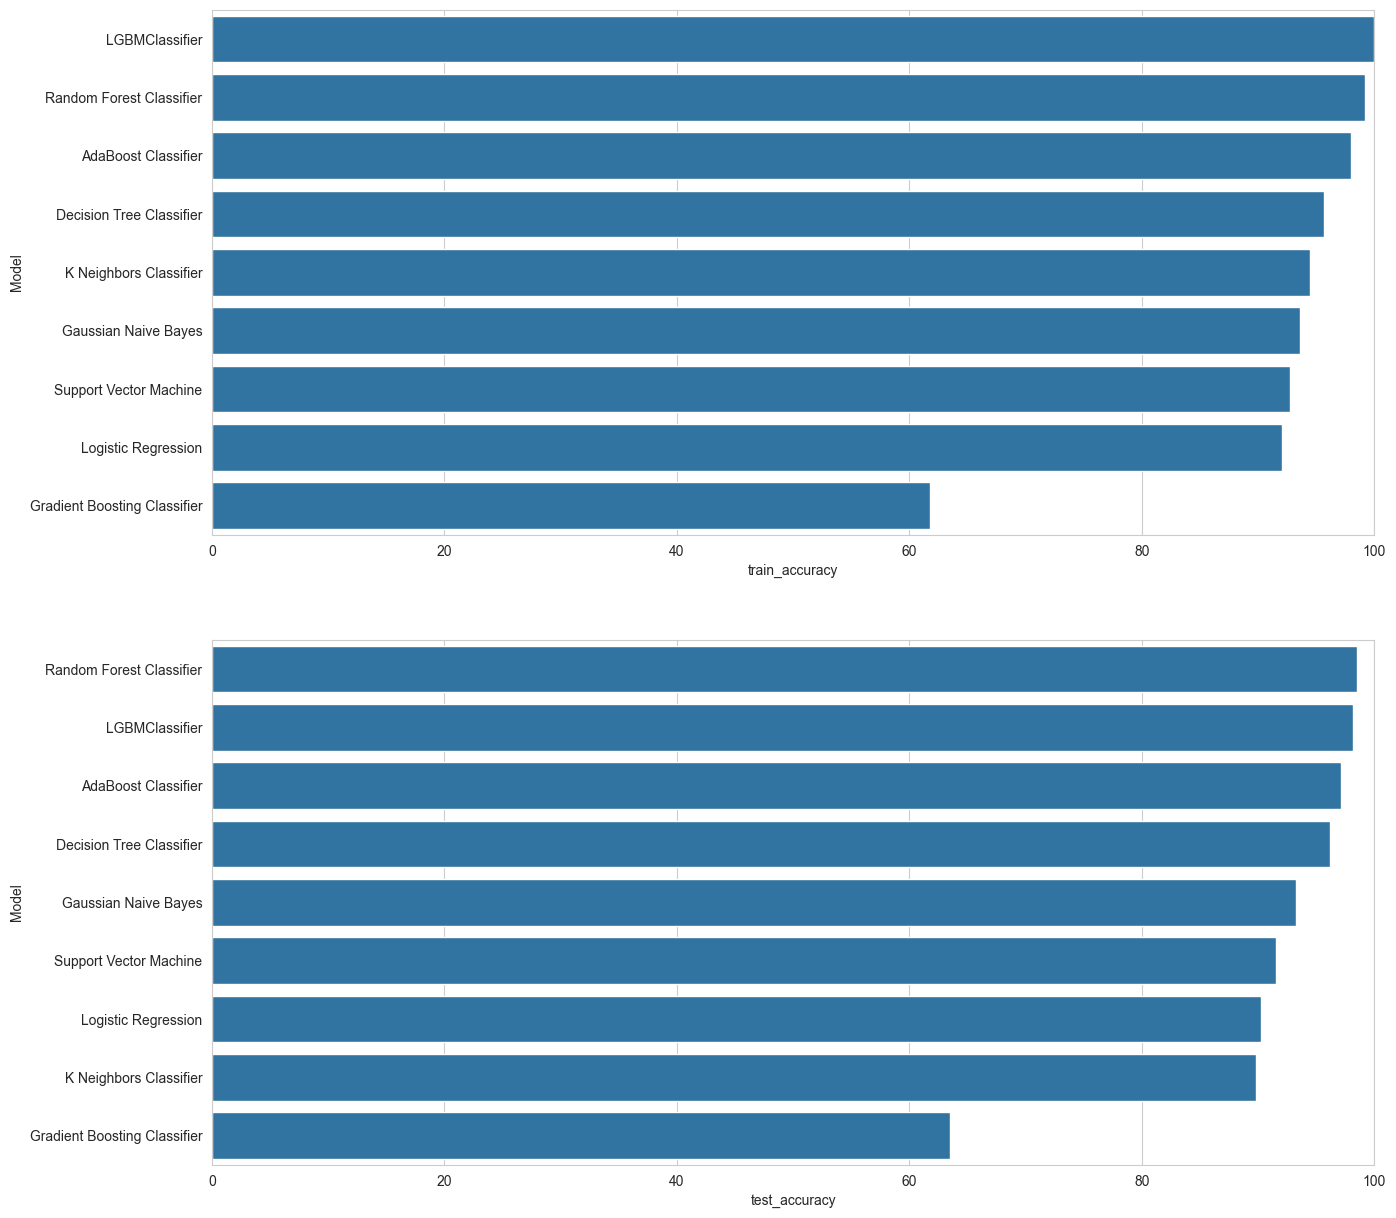

In [36]:
plot_train_test_accuracy(results_df)

In [37]:
def plot_precision_recall(df):
    _, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
    sns.barplot(data=df, x='test_precision',
                y='Model', orient='h', ax=ax[0],
               order=df.sort_values('test_precision',ascending = False).Model)
    ax[0].set_xlim([0, 100])
    sns.barplot(data=df, x='test_recall',
                y='Model', orient='h', ax=ax[1],
               order=df.sort_values('test_recall',ascending = False).Model)
    ax[1].set_xlim([0, 100])

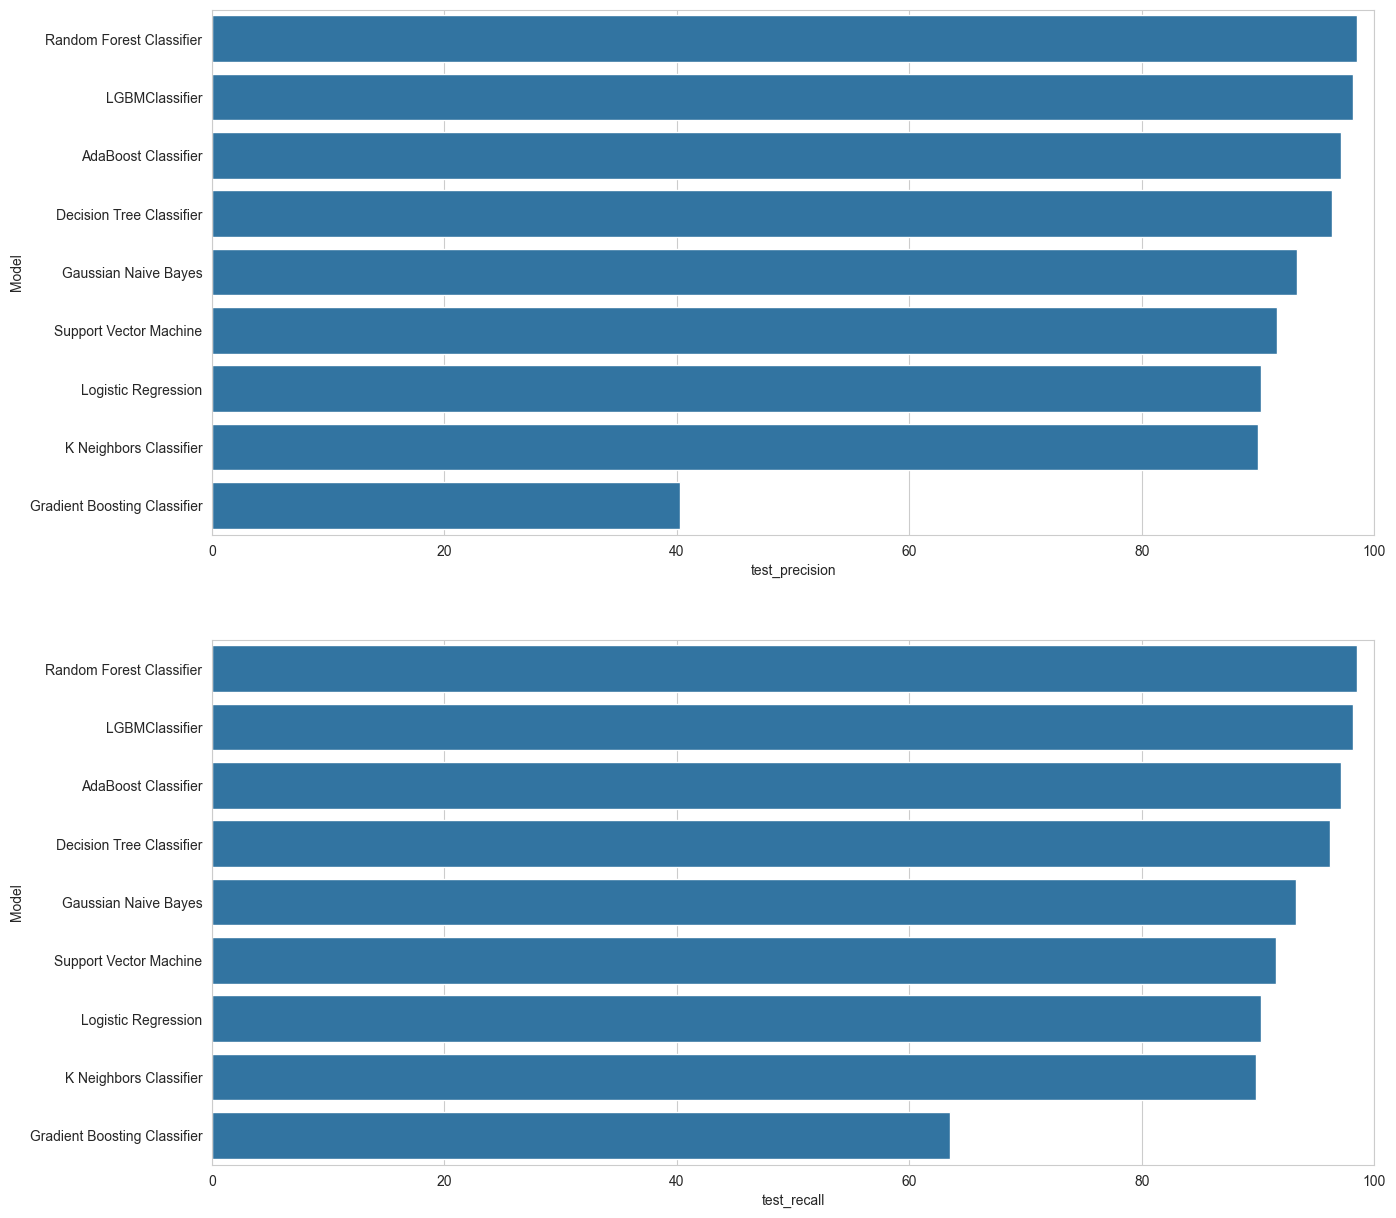

In [38]:
plot_precision_recall(results_df)



```
`# This is formatted as code`
```

##  Random Forest,

In [39]:
import joblib
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    max_depth=7, min_samples_split=5, min_samples_leaf=5, random_state=42
)

# Train the model
clf.fit(X_train, y_train)

# Save the model to a file
joblib.dump(clf, 'random_forest_model.pkl')

print("Model saved successfully.")


Model saved successfully.


In [40]:
import joblib

# Load the model from the file
loaded_model = joblib.load('random_forest_model.pkl')

print("Model loaded successfully.")

Model loaded successfully.


In [41]:
y_test.head()

1703    1
1173    0
308     1
1322    0
3271    0
Name: loan_status, dtype: int64